In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
from scipy import signal
from PIL import Image

In [13]:
# open original image and convert it to grayscale: (8-bit pixels, black and white)
img = Image.open('bridge.jpg')
# plt.imshow(img)

# img = np.array(img)
# h, w = img.shape

blocksize = 64
pos_x, pos_y = 200, 300
img = img.crop((pos_x, pos_y, pos_x + 64, pos_y + 64))

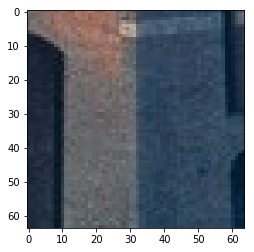

In [14]:
plt.imshow(img, cmap='gray')

In [10]:
def dct_2d(a):
    '''2D DCT'''
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [5]:
def image2hash(I, dct_size=32):
    I = I.resize((dct_size, dct_size))
#     I = img.resize(dct_block)
    I = I.convert(mode='L')
    dct = dct_2d(I)
    square = np.array(I)[:8, :8]
    seq = square.flatten()
    phash = [0 if x < np.mean(seq) else 1 for x in seq]
    return np.array(phash)

In [6]:
image2hash(img, dct_size=32)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])